2.1. Построить самоподобный граф с случайной процедурой ЗВЗ из всевозможных 2-3-4 вершинных графлетов до 5 уровня.

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def create_random_connected_graph(num_nodes):
    if num_nodes < 2 or num_nodes > 4:
        raise ValueError("Number of nodes must be 2, 3, or 4")

    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))


    if num_nodes == 2:
        G.add_edge(0, 1)
    elif num_nodes == 3:
        G.add_edge(0, 1)
        G.add_edge(1, 2)
    elif num_nodes == 4:
        G.add_edge(0, 1)
        G.add_edge(1, 2)


    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if not G.has_edge(i, j):
                if random.random() < 0.5:
                    G.add_edge(i, j)


    while not nx.is_connected(G):

        components = list(nx.connected_components(G))

        v1 = random.choice(list(components[0]))
        v2 = random.choice(list(components[1]))

        G.add_edge(v1, v2)

    return G


In [ ]:
def selfsimilar_graph(levels):
    def generate_graphs(current_level, max_levels, prev_graphs):
        if current_level == max_levels:
            return prev_graphs
        new_graphs = []
        for prev_graph in prev_graphs[-1]:
            new_graph = nx.Graph()
            prev_edges = list(prev_graph.edges())
            node_mapping = {}

            for node in prev_graph.nodes():
                base_graphlet = create_random_connected_graph(random.choice([2, 3, 4]))
                new_graph = nx.disjoint_union(new_graph, base_graphlet)
                node_mapping[node] = max(new_graph.nodes())

            for u, v in prev_edges:
                u_new = node_mapping[u]
                v_new = node_mapping[v]
                if not new_graph.has_edge(u_new, v_new):
                    new_graph.add_edge(u_new, v_new)

            new_graphs.append(new_graph)
        prev_graphs.append(new_graphs)
        return generate_graphs(current_level + 1, max_levels, prev_graphs)

    base_graph = create_random_connected_graph(random.choice([2, 3, 4]))
    self_similar_graphs = [[base_graph.copy()]]

    return generate_graphs(1, levels, self_similar_graphs)



2.2. Визуализировать в удобоваримом виде (чтобы были видны ребра, а не все в одну кучу), с минимальным пересечением ребер на плоскости.

Level 1:


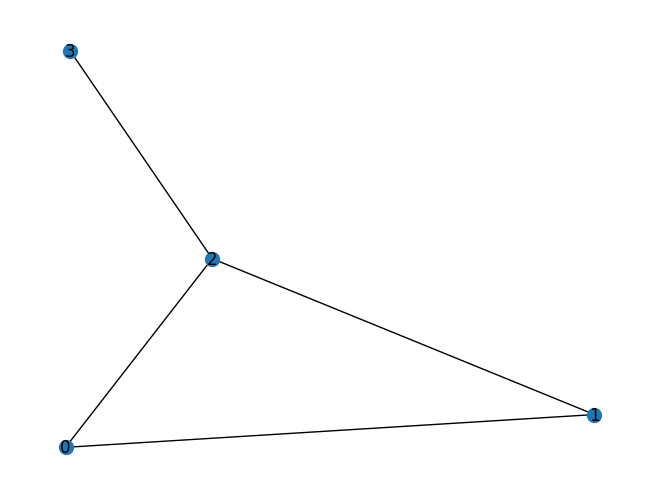

Level 2:


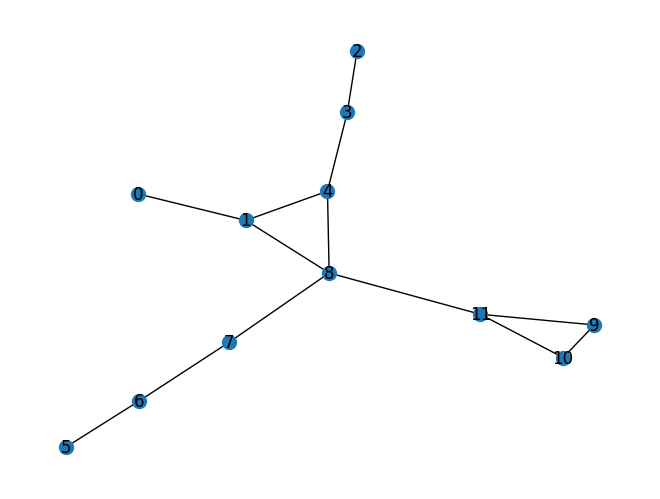

Level 3:


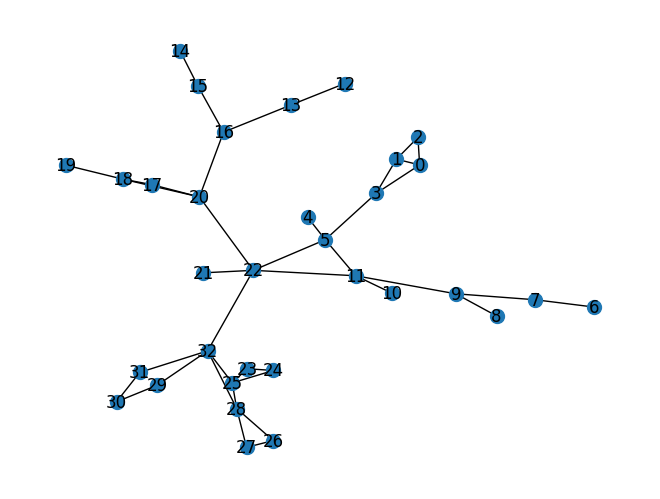

Level 4:


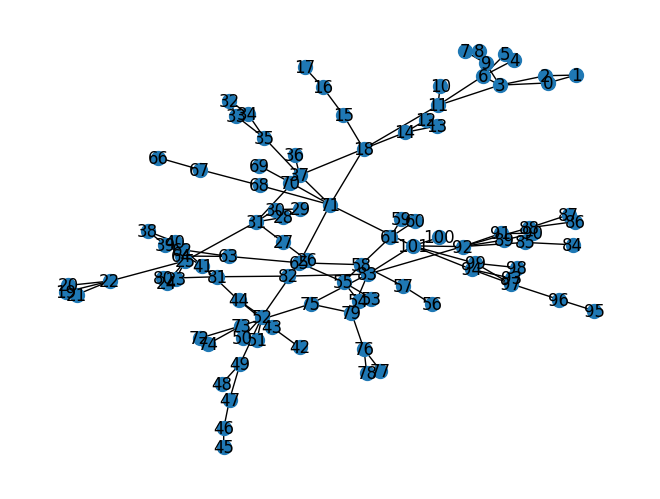

Level 5:


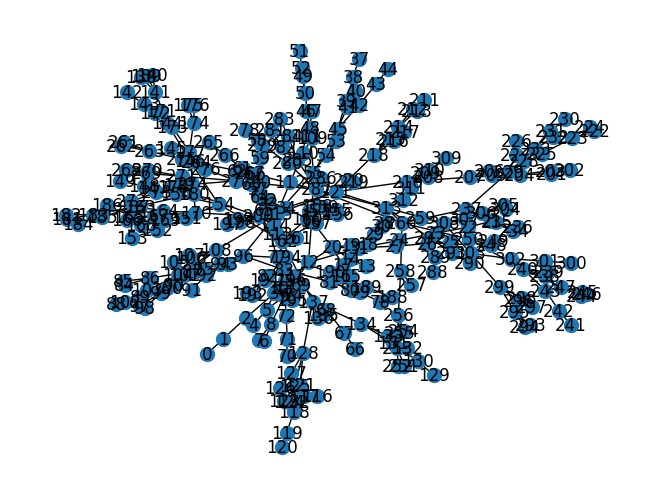

In [ ]:
levels = 5
self_similar_graphs = selfsimilar_graph(levels)
for level, graphs in enumerate(self_similar_graphs):
    print(f"Level {level + 1}:")
    for i, graph in enumerate(graphs):
        nx.draw(graph, with_labels=True,node_size = 100)
        plt.show()

2.3. Вычислить коэффициент кластеризации полученного графа.

Level 1:


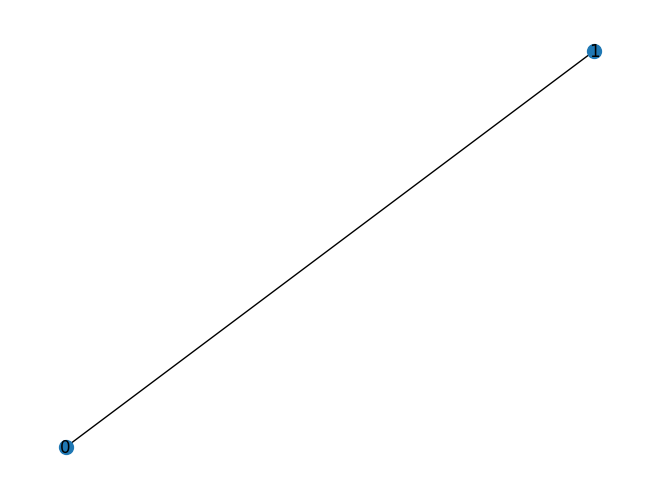

Average Clustering Coefficient: 0.0
Level 2:


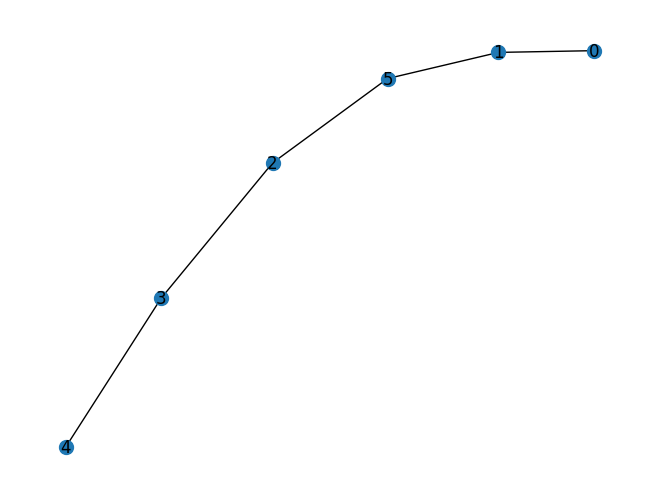

Average Clustering Coefficient: 0.0
Level 3:


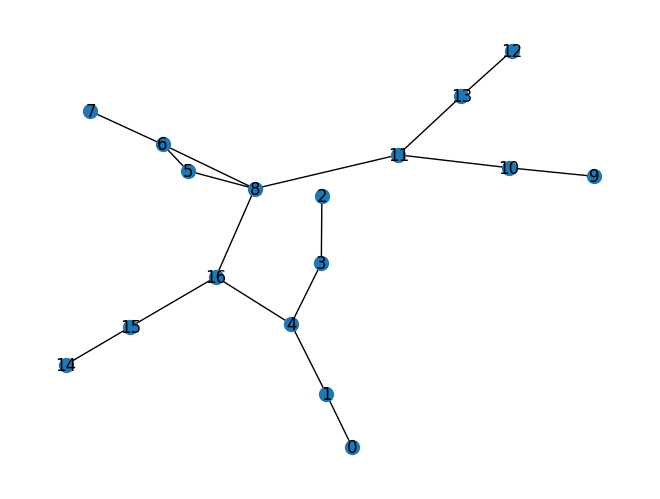

Average Clustering Coefficient: 0.08823529411764706
Level 4:


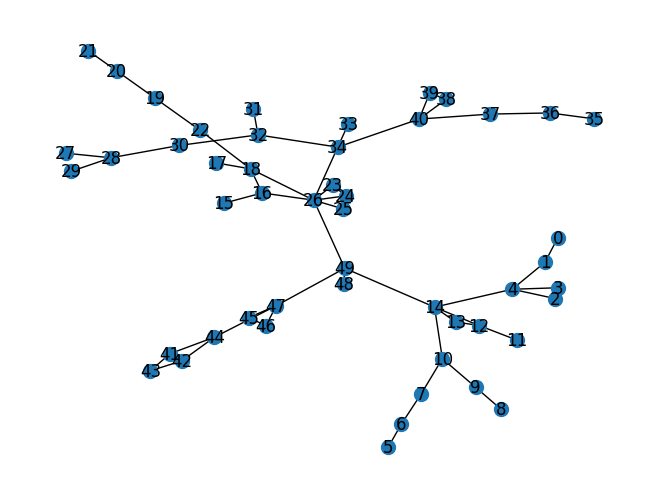

Average Clustering Coefficient: 0.2781904761904762
Level 5:


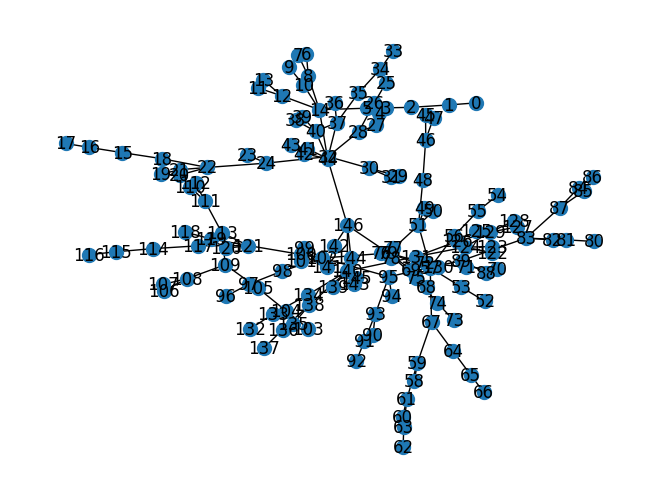

Average Clustering Coefficient: 0.30991253644314876


In [ ]:
levels = 5
self_similar_graphs = selfsimilar_graph(levels)
for level, graphs in enumerate(self_similar_graphs):
    print(f"Level {level + 1}:")
    for i, graph in enumerate(graphs):
        nx.draw(graph, with_labels=True,node_size = 100)
        plt.show()
        clustering_coefficients = nx.clustering(graph)
        average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
        print("Average Clustering Coefficient:", average_clustering_coefficient)


2.4. Решить обратную задачу – найти графлеты 2-3-4 в построенном графе.

2.5. Посчитать статистику – количество разных графлетов.

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def create_random_connected_graph(num_nodes):

    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))


    G.add_edge(0,1)
    G.add_edge(1,2)
    G.add_edge(2,3)
    G.add_edge(3,4)
    G.add_edge(4,5)
    G.add_edge(5,0)
    G.add_edge(1,5)
    G.add_edge(2,4)
    G.add_edge(3,0)


    return G


In [ ]:
def selfsimilar_graph(levels):
    def generate_graphs(current_level, max_levels, prev_graphs):
        if current_level == max_levels:
            return prev_graphs
        new_graphs = []
        for prev_graph in prev_graphs[-1]:
            new_graph = nx.Graph()
            prev_edges = list(prev_graph.edges())
            node_mapping = {}

            for node in prev_graph.nodes():
                base_graphlet = create_random_connected_graph(6)
                new_graph = nx.disjoint_union(new_graph, base_graphlet)
                node_mapping[node] = max(new_graph.nodes())

            for u, v in prev_edges:
                u_new = node_mapping[u]
                v_new = node_mapping[v]
                if not new_graph.has_edge(u_new, v_new):
                    new_graph.add_edge(u_new, v_new)

            new_graphs.append(new_graph)
        prev_graphs.append(new_graphs)
        return generate_graphs(current_level + 1, max_levels, prev_graphs)

    base_graph = create_random_connected_graph(6)
    self_similar_graphs = [[base_graph.copy()]]

    return generate_graphs(1, levels, self_similar_graphs)



Level 1:


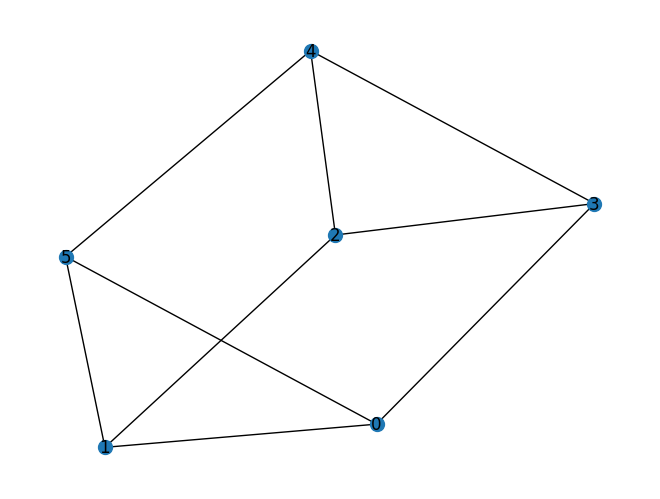

Average Clustering Coefficient: 0.3333333333333333
Level 2:


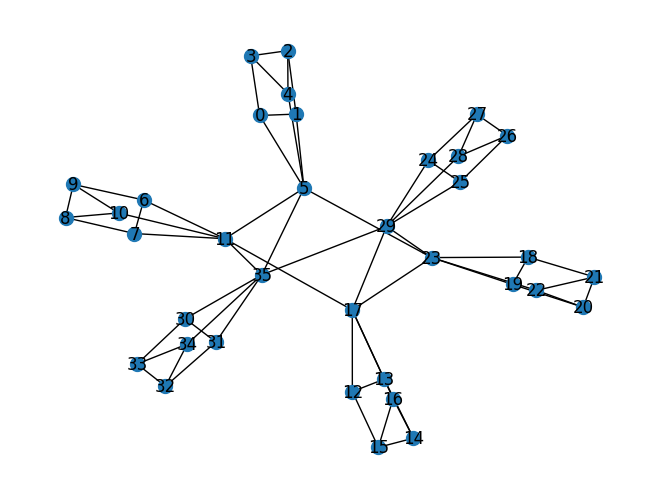

Average Clustering Coefficient: 0.30000000000000004
Level 3:


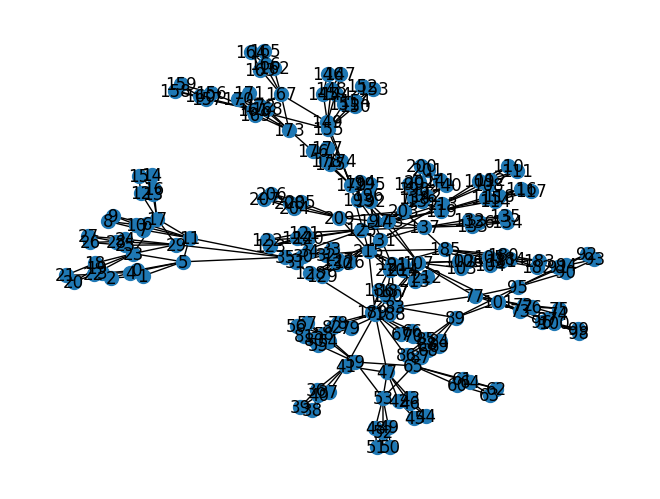

Average Clustering Coefficient: 0.2986111111111118
Level 4:


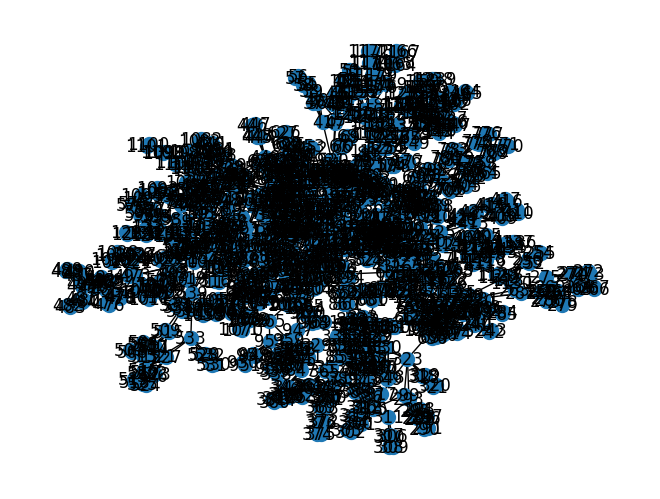

Average Clustering Coefficient: 0.29850589225588836
Level 5:


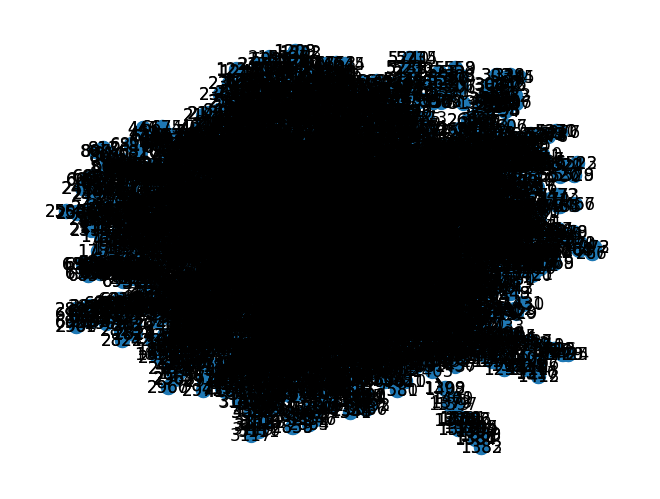

Average Clustering Coefficient: 0.2984958714125345


In [ ]:
levels = 5
self_similar_graphs = selfsimilar_graph(levels)
for level, graphs in enumerate(self_similar_graphs):
    print(f"Level {level + 1}:")
    for i, graph in enumerate(graphs):
        nx.draw(graph, with_labels=True,node_size = 100)
        plt.show()
        clustering_coefficients = nx.clustering(graph)
        average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
        print("Average Clustering Coefficient:", average_clustering_coefficient)
